In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.enable_eager_execution()

In [3]:
from data_utils import load_mnist, load_fashion_mnist
from models import ConvModel, CapsuleBlock, CapsuleNet
from training import train
from capsules import Length, margin_loss, squash

import operations as ops

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = load_mnist(flat=False)
num_class = 10

In [5]:
N = 9

alpha = tf.random_normal(shape=(len(ops.OPERATIONS), N, N-1),)
architecture = tf.get_variable('architecture', dtype=tf.float32, initializer=alpha)

capsmodel = CapsuleNet(16)
convmodel = ConvModel(N=N, channels=256)

In [6]:
caps_loss = train(capsmodel, data=load_mnist(flat=False), batch_size=256, num_batches=16)

................

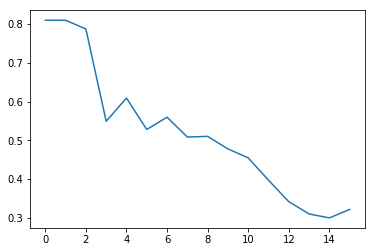

In [7]:
plt.plot(caps_loss['train'])

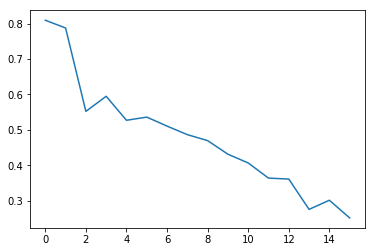

In [8]:
plt.plot(caps_loss['val'])

In [9]:
conv_loss = train(convmodel, data=load_mnist(flat=False), architecture=architecture, batch_size=32, num_batches=16)

................

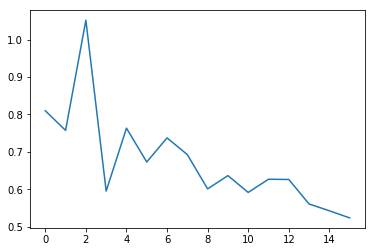

In [10]:
plt.plot(conv_loss['train'])

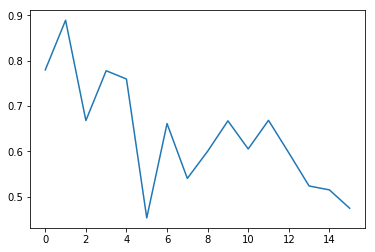

In [11]:
plt.plot(conv_loss['val'])